# Lab 3

In [69]:
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [70]:
DATA_PATH = '../data/'
START_DATE = '01/02/2007'
END_DATE = '02/02/2007'

## Car MPG

### Download

In [71]:
car_mpg = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

car_mpg['mpg']
car_mpg.mpg
car_mpg.iloc[0,:]

car_mpg.to_csv(f'{DATA_PATH}car_mpg.csv', index=False)
car_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


### Preprocess

In [72]:
for col in list(car_mpg)[:-1]:
    v = int(car_mpg[col].mean())
    car_mpg[col] = car_mpg[col].fillna(v)
car_mpg['company'] = car_mpg.car_name.str.split(expand=True)[0].values
car_mpg.to_csv(f'{DATA_PATH}car_mpg_preprocessed.csv', index = False)

In [101]:
car_mpg = pd.read_csv(f'{DATA_PATH}car_mpg_preprocessed.csv')
car_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,company
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,chevrolet
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,buick
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,plymouth
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,amc
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,ford


### Câu 1

In [74]:
#1
numCar = car_mpg.car_name.value_counts()
print("Number of Car:", numCar.shape[0])
print("Number of attributes:",len(car_mpg.columns))

Number of Car: 312
Number of attributes: 10


### Câu 2

In [75]:
#2
numCompany = car_mpg.company.value_counts()
print("Number of car company:",numCompany.shape[0])

d = 0
for i in range(0,car_mpg.shape[0]):
    if car_mpg.iloc[i,0] == car_mpg.mpg.max():
        d = i
print("Car have the max MPG:", car_mpg.iloc[d,8])

new = car_mpg.loc[car_mpg['cylinders'] == 8.0]
company = new.company.value_counts()
print("The company produced the most 8-cylinder cars:",company.index[0])

car_name = []
for i in range(0,car_mpg.shape[0]):
    if car_mpg.iloc[i,1] == 3.0:
        car_name.append(car_mpg.iloc[i,8])

def unique(list1,list2):
    list_set = set(list1)
    unique_list = (list(list_set))
    for x in unique_list:
        list2.append(x)

new_car_name = []
unique(car_name,new_car_name)
print("Name of cars have 3 cylinders:",new_car_name)


Number of car company: 38
Car have the max MPG: mazda glc
The company produced the most 8-cylinder cars: ford
Name of cars have 3 cylinders: ['mazda rx2 coupe', 'maxda rx3', 'mazda rx-7 gs', 'mazda rx-4']


### Câu 3

In [76]:
#3
car_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.504433,5.475369,194.779557,105.081281,2979.413793,15.519704,75.921182,1.568966
std,7.738736,1.712160,104.922458,38.480533,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,76.000000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Câu 4

In [77]:
def draw_hist(colName, bins=20, figsize=(8,5), rotation=0):
    plt.figure(figsize=figsize)
    plt.xticks(rotation=rotation)
    plt.grid(b=True, zorder=0)
    plt.hist(car_mpg[colName], bins=bins, density=True, zorder=5)
    plt.xlabel(colName)
    plt.ylabel('prob')
    plt.title(f'Histogram of {colName}, bins = {bins}')

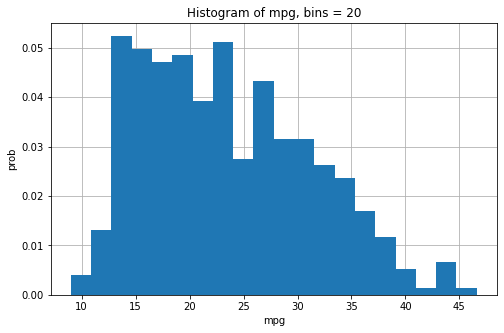

In [78]:
# mpg
draw_hist('mpg')

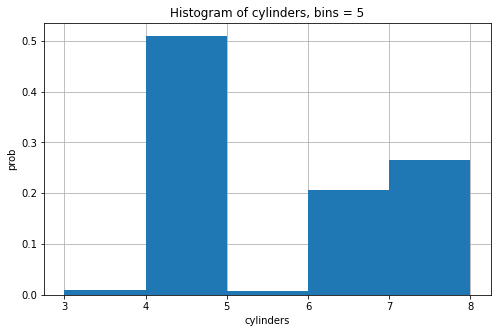

In [79]:
# cylinders
draw_hist('cylinders', bins=5)

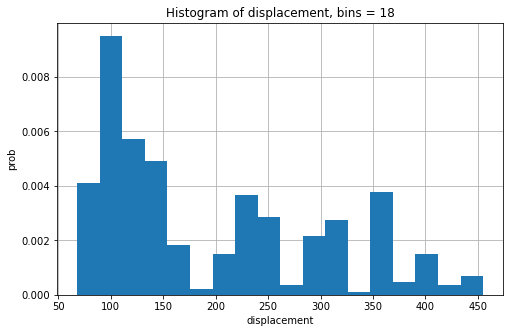

In [80]:
# displacement
draw_hist('displacement', bins=18)

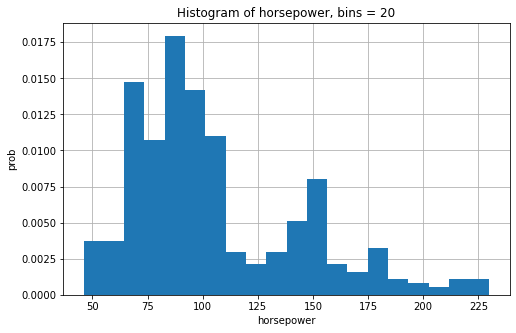

In [81]:
# horsepower
draw_hist('horsepower')

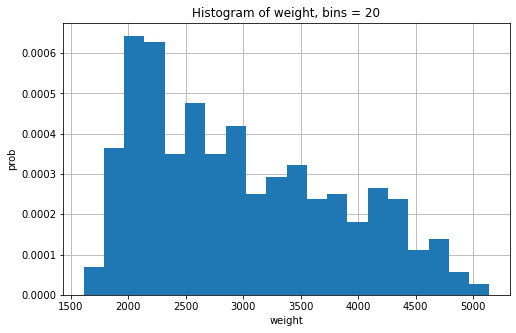

In [82]:
# weight
draw_hist('weight')

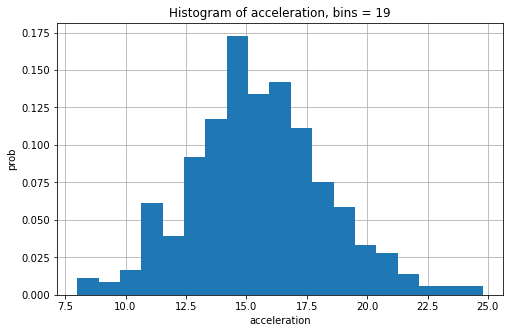

In [83]:
# acceleration
draw_hist('acceleration', bins=19)

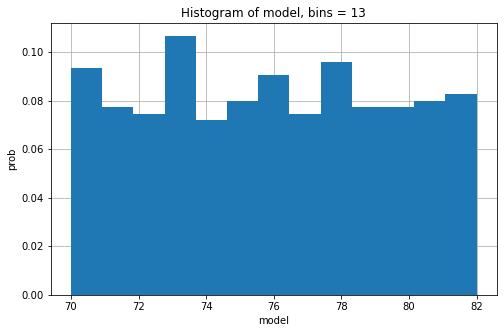

In [84]:
# model	
draw_hist('model', bins=13)

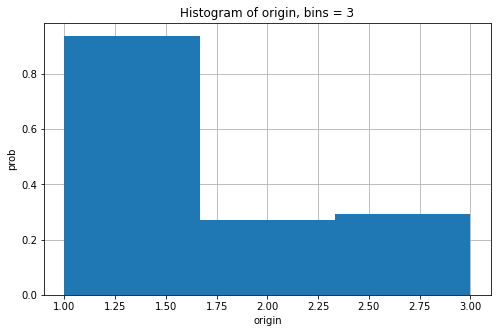

In [85]:
# origin
draw_hist('origin', bins=3)

### Câu 5

Text(0.5, 1.0, 'Scatter plot giữa Weight và MPG')

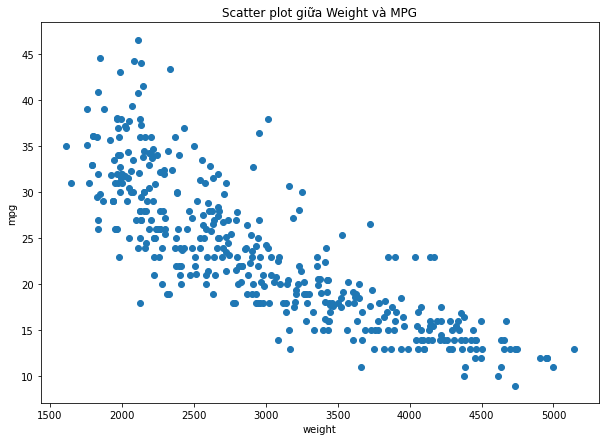

In [86]:
plt.figure(figsize=(10,7))
plt.scatter(car_mpg['weight'], car_mpg['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('Scatter plot giữa Weight và MPG')

In [87]:
cov = np.cov(car_mpg['weight'], car_mpg['mpg'], ddof=0)
cov[0][1]

-5387.709470018684

- Nhận xét: 
    - Hệ số tương cao cao vcl và âm chứng tỏ giữa 2 cái này tồn tại quan hệ nghịch biến
    - Điều này là dễ hiểu vì khi tăng khối lượng xe và giữ nguyên lượng xăng (1 gallon) thì mpg bao sure là giảm

### Câu 6

Text(0.5, 1.0, 'Scatter plot giữa Year và cylinders')

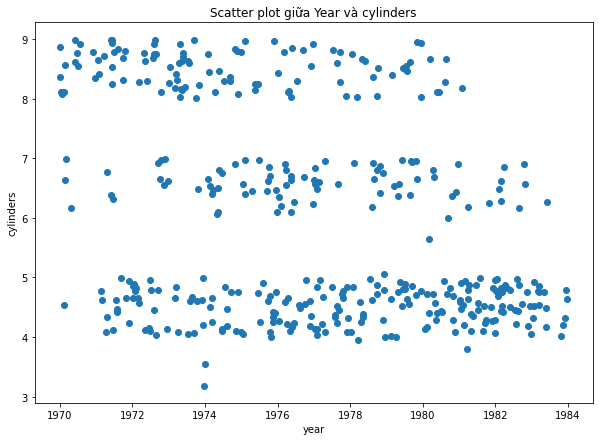

In [104]:
plt.figure(figsize=(10,7))
year = car_mpg['model'] + 1900 + np.random.rand(len(car_mpg['model'])) * 2
cylinders = car_mpg['cylinders'] + np.random.rand(len(car_mpg['cylinders']))

plt.scatter(year, cylinders)
plt.xlabel('year')
plt.ylabel('cylinders')
plt.title('Scatter plot giữa Year và cylinders')

### Câu 7

Text(0.5, 1.0, 'Scatter plot giữa Cylinders và Displacement')

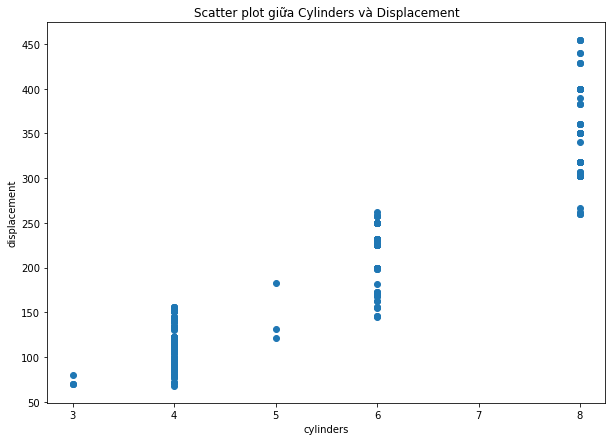

In [89]:
plt.figure(figsize=(10,7))
plt.scatter(car_mpg['cylinders'], car_mpg['displacement'])
plt.xlabel('cylinders')
plt.ylabel('displacement')
plt.title('Scatter plot giữa Cylinders và Displacement')

Nhận xét:
- Ta có thể quan sát rõ được sự tương quan thuận giữa số cylinder và displacement.
- Đúng như trong thực tế, những cỗ máy có nhiều xi-lanh thường đi với một dung tích lớn để tăng công suất cho xe.
- Động cơ 4 xi-lanh, dung tích nhỏ thường được sử dụng cho xe tầm trung, đa dụng nên có số lượng tương đối nhiều.

Text(0.5, 1.0, 'Scatter plot giữa Acceleration và Horsepower')

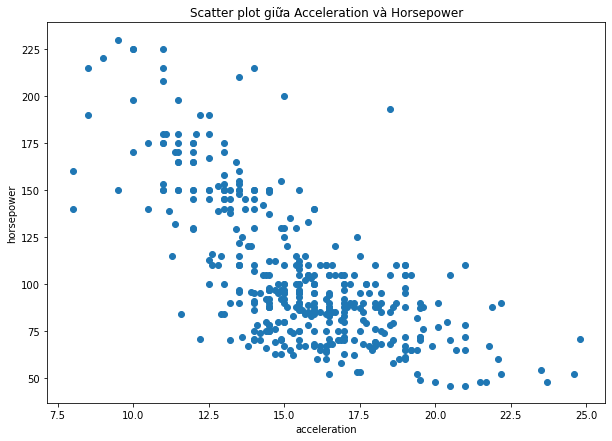

In [90]:
plt.figure(figsize=(10,7))
plt.scatter( car_mpg['acceleration'],car_mpg['horsepower'])
plt.xlabel('acceleration')
plt.ylabel('horsepower')
plt.title('Scatter plot giữa Acceleration và Horsepower')

Nhận xét:
- Ta có thể quan sát rõ được sự tương quan nghịch giữa chỉ số acceleration và horsepower.
- Điều đó thể hiện nếu xe có khả năng tăng tốc mạnh lúc đầu (acceleration cao) thì khi càng chạy nhanh sẽ khó đạt được vận tốc tối đa (công suất thấp - horsepower thấp) và ngược lại.
- Các điểm tập trung nhiều ở giữa biểu đồ thể hiện các dòng xe đều hướng đến sự cân bằng ở hai chỉ số này.

### Câu 8

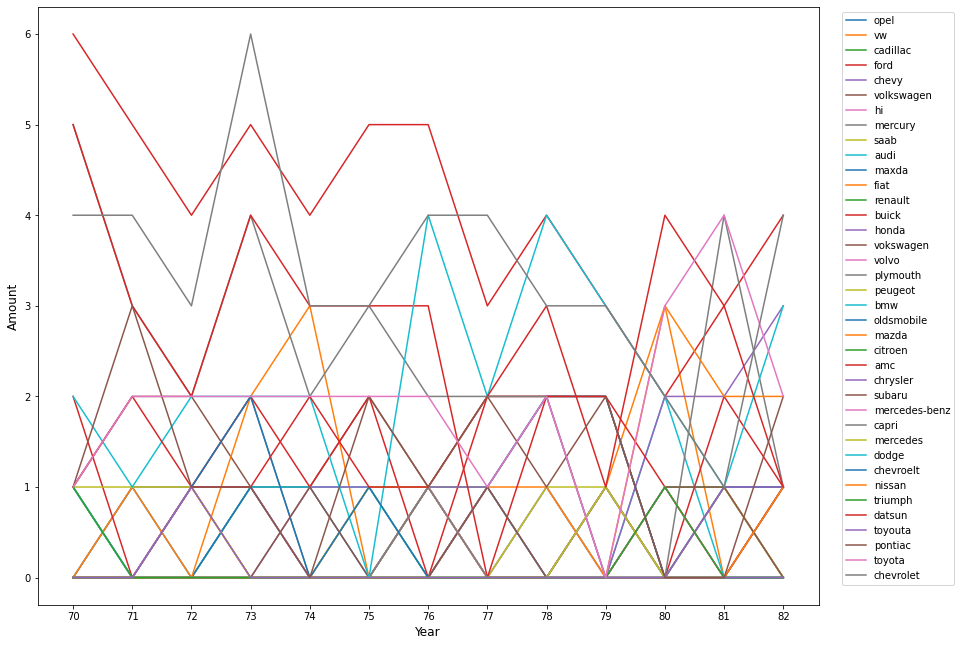

In [91]:
companyList = list(set(car_mpg['company'].values))
years = list(set(car_mpg['model'].values))
cpy = pd.DataFrame(columns=companyList)

for col in list(cpy):
    amount = []
    for year in years:
        amount.append(sum((car_mpg['model'] == year) & (car_mpg['company'] == col)))
    cpy[col] = amount
cpy.index = years

plt.figure(figsize =(14,11))
for col in list(cpy):
    plt.plot(cpy[col], label=col)
plt.xticks(cpy.index)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.legend(bbox_to_anchor=(1.18, 1), loc=0)

## cpy: car per year của các hãng
#cpy
plt.show()

Nhận xét:
- Các hãng lớn sẽ ra mắt từ 2 - 6 xe mỗi năm, còn các hãng còn lại thì chỉ từ 1 - 2 xe.
- Các hãng xe có xu hướng ra mắt giảm dần số lượng dần về những năm cuối thập kỷ và cho ra mắt hàng loạt số lượng xe mới vào nhứng năm đầu của thập kỷ kế tiếp.

### Câu 9

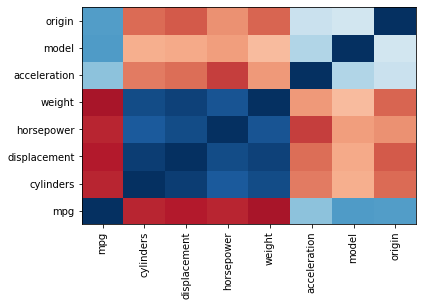

In [92]:
# car_mpg.iloc[:,0:8].corr()
plt.pcolor(car_mpg.iloc[:,0:8].corr(), cmap='RdBu', vmin=-1, vmax=1)

plt.yticks(np.arange(8) + 0.5, list(car_mpg)[:8])
plt.xticks(np.arange(8) + 0.5, list(car_mpg)[:8], rotation=90)
plt.show()

## Electric Power Compsumtion

### Preprocess

In [93]:
# # Read data
# power = pd.read_csv('../data/household_power_consumption.csv', delimiter=';')

# # Convert to datetime dtype
# power.Date = pd.to_datetime(power.Date)

# # Get date from START_DATE to END_DATE
# power = power[(power['Date'] >= START_DATE) & (power['Date'] <= END_DATE)]
# # power1 = power[power.Date == START_DATE]
# # power2 = power[power.Date == END_DATE]
# # power = pd.concat([power1, power2])

# # Write preprocessed data to csv
# power.to_csv('../data/household_power_consumption_preprocessed.csv', index = False)
# power1

In [94]:
power = pd.read_csv(f'{DATA_PATH}household_power_consumption_preprocessed.csv')
power

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2007-01-02,00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0
1,2007-01-02,00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0
2,2007-01-02,00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0
3,2007-01-02,00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0
4,2007-01-02,00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2875,2007-02-02,23:55:00,3.696,0.226,240.90,15.2,0.0,1.0,18.0
2876,2007-02-02,23:56:00,3.698,0.226,241.02,15.2,0.0,2.0,18.0
2877,2007-02-02,23:57:00,3.684,0.224,240.48,15.2,0.0,1.0,18.0
2878,2007-02-02,23:58:00,3.658,0.220,239.61,15.2,0.0,1.0,17.0


### Plot 1

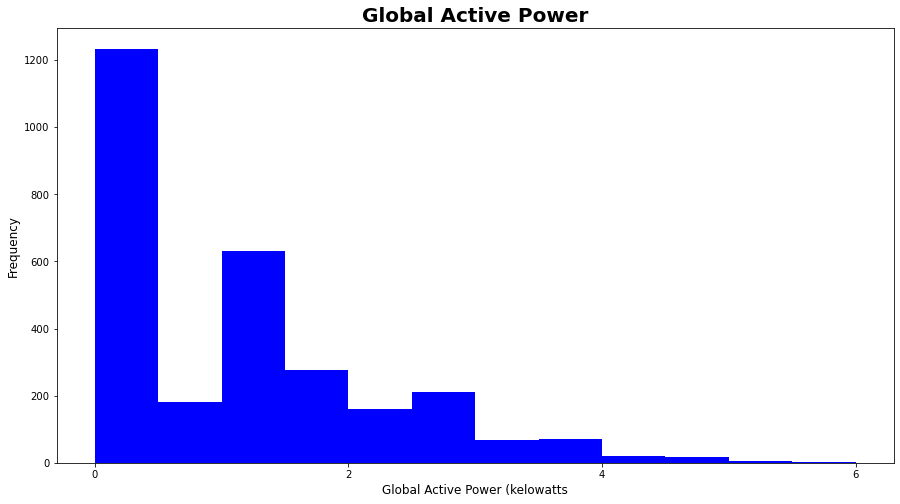

In [95]:
num_bins = 12
plt.figure(figsize =(15,8))
plt.hist(power['Global_active_power'].values, bins=np.arange(0, 6.5, 0.5), facecolor='blue')
plt.title('Global Active Power', fontweight='bold', fontsize=20)
plt.xlabel('Global Active Power (kelowatts', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0,7,2))
plt.show()

### Plot 2

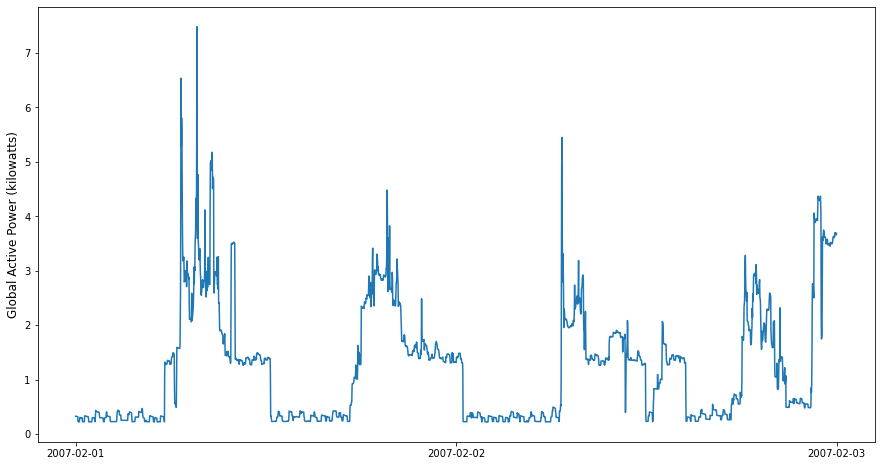

In [96]:
plt.figure(figsize =(15,8))
plt.plot(power['Global_active_power'].values)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.xticks([0, 1440, 2880], ['2007-02-01', '2007-02-02', '2007-02-03'])
plt.show()

### Plot 3

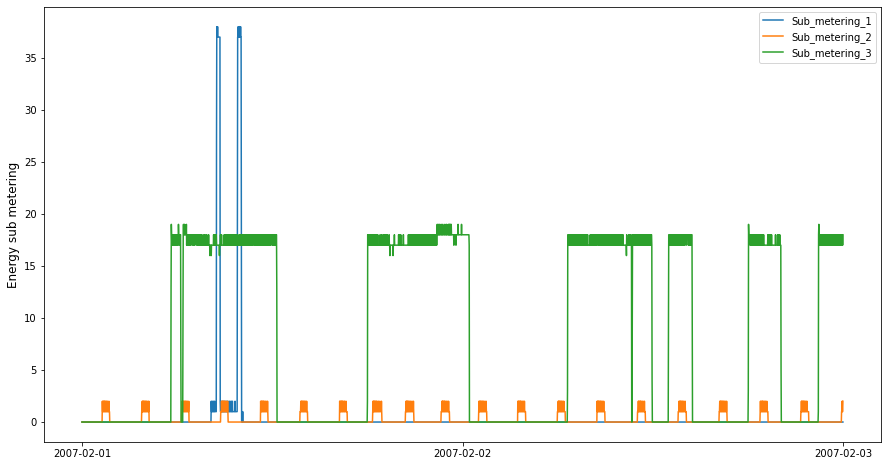

In [97]:
plt.figure(figsize =(15,8))
plt.plot(power['Sub_metering_1'].values)
plt.plot(power['Sub_metering_2'].values)
plt.plot(power['Sub_metering_3'].values)
plt.ylabel('Energy sub metering', fontsize=12)
plt.xticks([0, 1440, 2880], ['2007-02-01', '2007-02-02', '2007-02-03'])
plt.legend(['Sub_metering_1','Sub_metering_2','Sub_metering_3'], loc = "upper right")
plt.show()

### Plot 4

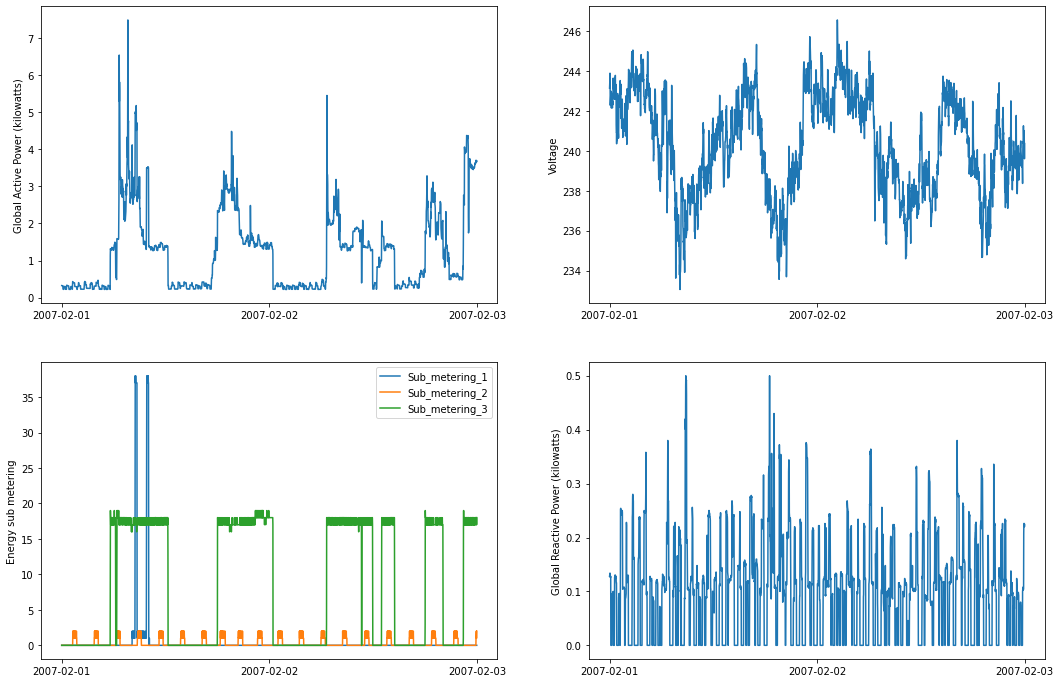

In [98]:
fig, axes = plt.subplots(2,2,figsize=(18,12))

axes[0, 0].plot(power['Global_active_power'].values)
axes[0, 0].set_ylabel('Global Active Power (kilowatts)')
axes[0, 0].set_xticks([0, 1440, 2880])
axes[0, 0].set_xticklabels(['2007-02-01', '2007-02-02', '2007-02-03'])

axes[0, 1].plot(power['Voltage'].values)
axes[0, 1].set_ylabel('Voltage')
axes[0, 1].set_xticks([0, 1440, 2880])
axes[0, 1].set_xticklabels(['2007-02-01', '2007-02-02', '2007-02-03'])

axes[1, 0].plot(power['Sub_metering_1'].values)
axes[1, 0].plot(power['Sub_metering_2'].values)
axes[1, 0].plot(power['Sub_metering_3'].values)
axes[1, 0].set_ylabel('Energy sub metering')
axes[1, 0].set_xticks([0, 1440, 2880])
axes[1, 0].set_xticklabels(['2007-02-01', '2007-02-02', '2007-02-03'])
axes[1, 0].legend(['Sub_metering_1','Sub_metering_2','Sub_metering_3'], loc = "upper right")

axes[1, 1].plot(power['Global_reactive_power'].values)
axes[1, 1].set_ylabel('Global Reactive Power (kilowatts)')
axes[1, 1].set_xticks([0, 1440, 2880])
axes[1, 1].set_xticklabels(['2007-02-01', '2007-02-02', '2007-02-03'])
plt.show()